## Cross-omics translation using spaAnchor

In this section, we illustrate spaAnchor for omics translation.
In this expirement scenario, we use the whole transcriptomics panel as shared feature to predict the protein expression information.
We use the SPOTS obtained [mouse spleen dataset](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE198353) for evaluation.

User should organize the protein expression data for your source slice into a `pd.DataFrame`.
Each rows should correspond to the cells/spots in `adata.obs_names` and each columns must correspond to the protein names.
Store this DataFrame in the `adata.obsm["protein"]`.

In [1]:
import spaAnchor as sa
import scanpy as sc
import pandas as pd

adata0 = sc.read("/mnt/sde/data/spleen_rna_protein/spleen_rep1_rna.h5ad")
adata1 = sc.read("/mnt/sde/data/spleen_rna_protein/spleen_rep2_rna.h5ad")
adata1_omics = sc.read("/mnt/sde/data/spleen_rna_protein/spleen_rep2_adt.h5ad")

adata0.var_names_make_unique()
adata1.var_names_make_unique()
adata1.obsm["protein"]= pd.DataFrame(adata1_omics.X.toarray(), index=adata1_omics.obs_names, columns=adata1_omics.var_names)

Once your data is prepared, use the preset `rna2protein()` class to perform the translation.

In [2]:
model = sa.rna2protein()
predicted_result = model([adata0.copy(), adata1.copy()])

INFO: Finish preprocessing. (2.078s)
INFO: Generate 9,226 edges, average 3.478 edges per cell.
INFO: Generate 9,645 edges, average 3.484 edges per cell.
INFO: Finish latent embedding generating. (13.614s)
INFO: Finish HANN pairs finding. (1.351s)


INFO: Learn aggregate attention score: 100%|██████████| 500/500 [00:02<00:00, 212.36it/s]


INFO: Finish transformation. (12.285s)


User can easily visualize the spatial patterns of several important protein marker.

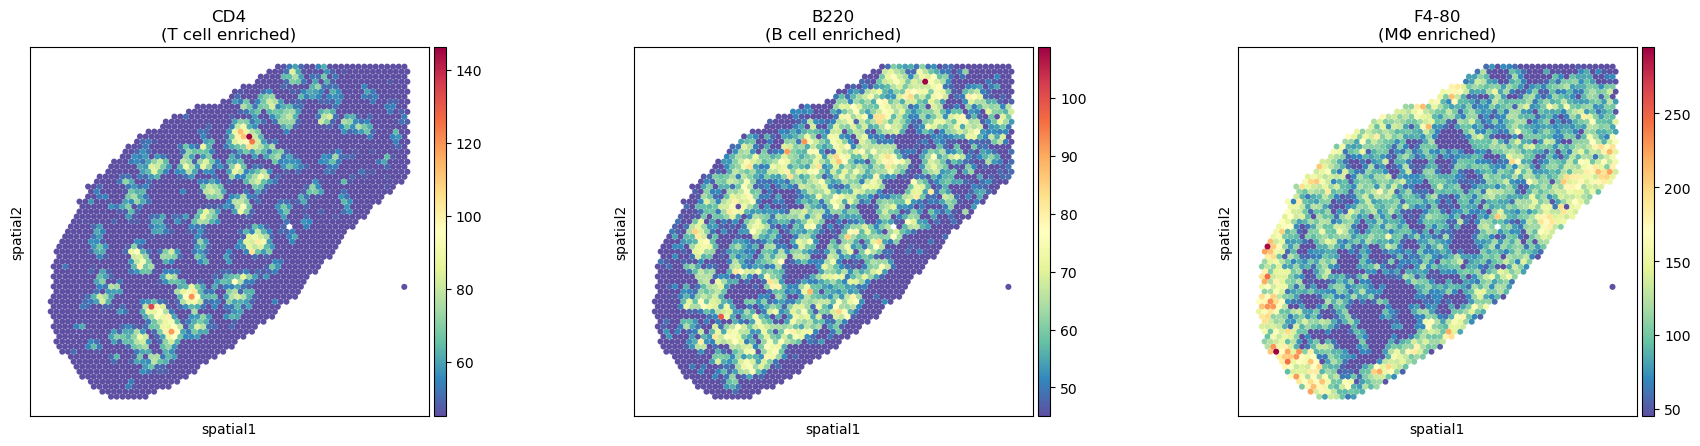

In [3]:
adata0.obs_names += "-0"
viz_protein = ["CD4", "B220_CD45R", "F4_80"]
adata0.obs[[f"pred_{adt}" for adt in viz_protein]] = predicted_result[0]["protein"][viz_protein]
sc.pl.spatial(adata0, color=[f"pred_{adt}" for adt in viz_protein], 
              title=["CD4\n(T cell enriched)", "B220\n(B cell enriched)", "F4-80\n(MΦ enriched)"], 
              img_key=None, frameon=False, spot_size=35, cmap="Spectral_r", vmin=45)